In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Load data

In [21]:
df = pd.read_csv(os.path.join("..", "data", "train.csv"), index_col="Id")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# Inspect columns

## Soil

In [52]:
df_soil = df.filter(regex="^Soil_Type")
df_exclude_soil = df.drop(df_soil.columns, axis=1)
df_exclude_soil_redo_onehot = df.drop(df_soil.columns, axis=1)
df_exclude_soil_redo_onehot["Soil_Type"] = df_soil.idxmax(axis=1).apply(lambda x: int(x[9:]))
df_soil.head()


,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_soil.sum()

Soil_Type1      355
Soil_Type2      623
Soil_Type3      962
Soil_Type4      843
Soil_Type5      165
Soil_Type6      650
Soil_Type7        0
Soil_Type8        1
Soil_Type9       10
Soil_Type10    2142
Soil_Type11     406
Soil_Type12     227
Soil_Type13     476
Soil_Type14     169
Soil_Type15       0
Soil_Type16     114
Soil_Type17     612
Soil_Type18      60
Soil_Type19      46
Soil_Type20     139
Soil_Type21      16
Soil_Type22     345
Soil_Type23     757
Soil_Type24     257
Soil_Type25       1
Soil_Type26      54
Soil_Type27      15
Soil_Type28       9
Soil_Type29    1291
Soil_Type30     725
Soil_Type31     332
Soil_Type32     690
Soil_Type33     616
Soil_Type34      22
Soil_Type35     102
Soil_Type36      10
Soil_Type37      34
Soil_Type38     728
Soil_Type39     657
Soil_Type40     459
dtype: int64

In [75]:
tmp = df_exclude_soil_redo_onehot.loc[:,["Cover_Type", "Soil_Type"]]#.groupby("Soil_Type")

/tmp/ipykernel_36438/2488230316.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tmp, x="Cover_Type", hue="Soil_Type", ax=ax)
/tmp/ipykernel_36438/2488230316.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tmp, x="Cover_Type", hue="Soil_Type", ax=ax)
/tmp/ipykernel_36438/2488230316.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tmp, x="Cover_Type", hue="Soil_Type", ax=ax)
/tmp/ipykernel_36438/2488230316.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


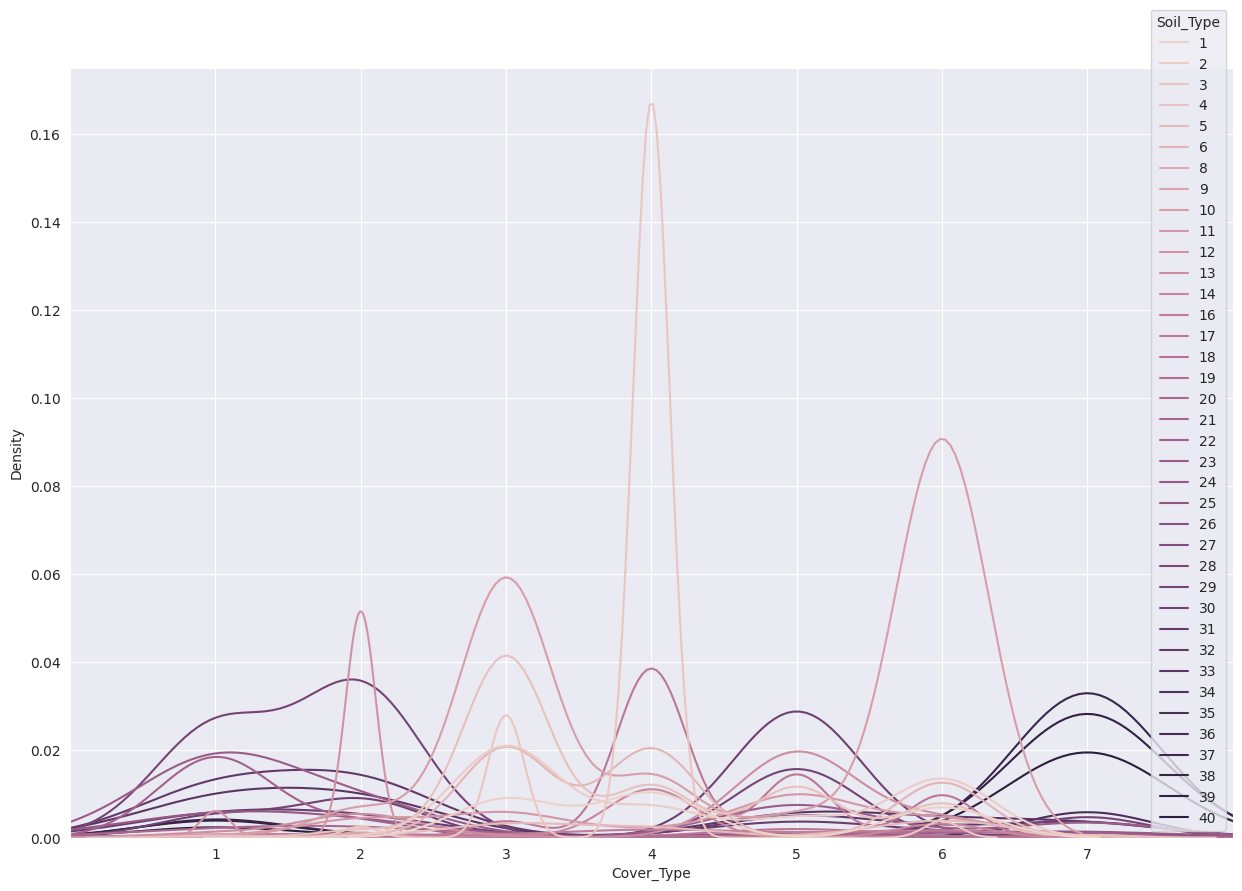

In [95]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(data=tmp, x="Cover_Type", hue="Soil_Type", ax=ax)
ax.set_xlim((0,8))
ax.set_xticks((1,2,3,4,5,6,7))
fig.show()

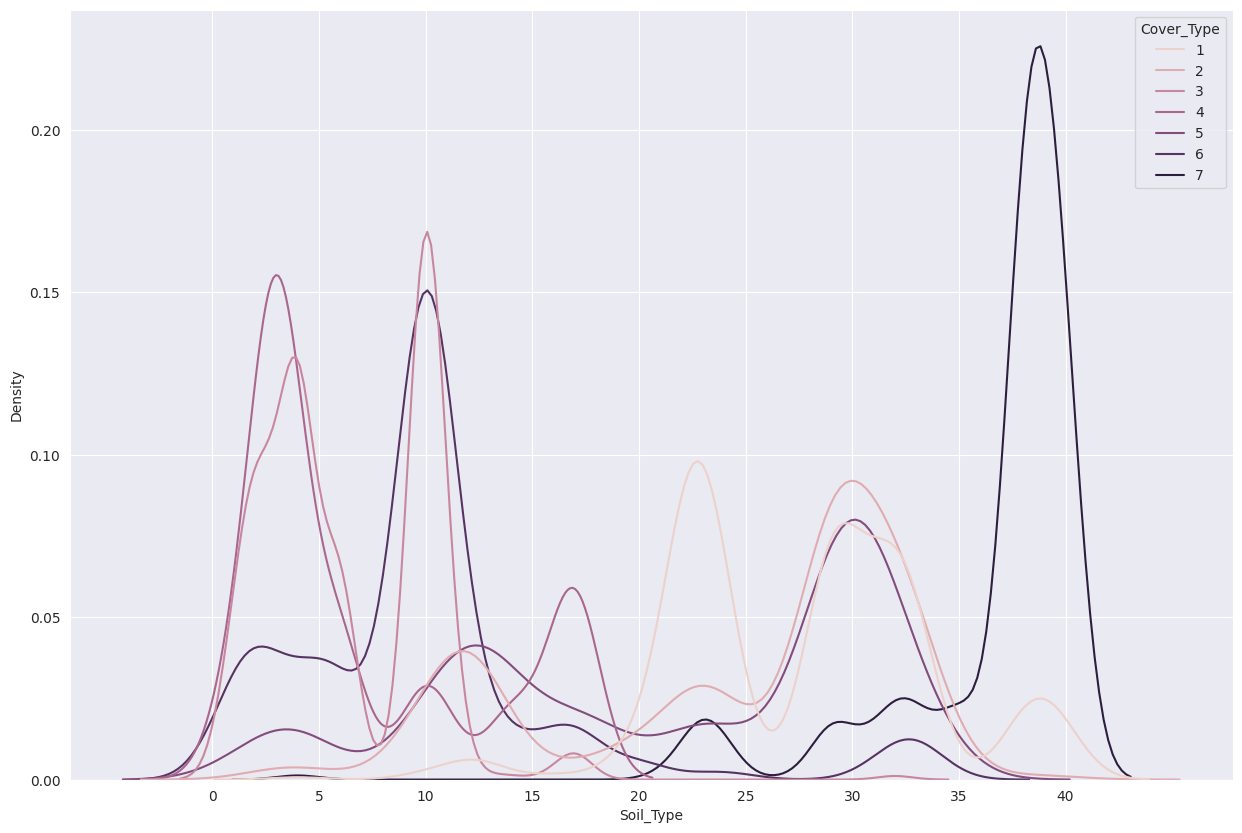

In [101]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(data=tmp[tmp["Cover_Type"]!=8], hue="Cover_Type", x="Soil_Type", ax=ax, common_norm=False)
ax.set_xticks(np.arange(0,41,5))


## Hillshade

In [107]:
df_hillshade = df.filter(regex="^Hillshade")
df_hillshade.head()


,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Id,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0


In [126]:
tmp = df.loc[:,["Cover_Type"] + list(df_hillshade.columns)]#.groupby("Soil_Type")

array([[<AxesSubplot: title={'center': 'Hillshade_9am'}>,
        <AxesSubplot: title={'center': 'Hillshade_Noon'}>],
       [<AxesSubplot: title={'center': 'Hillshade_3pm'}>,
        <AxesSubplot: >]], dtype=object)

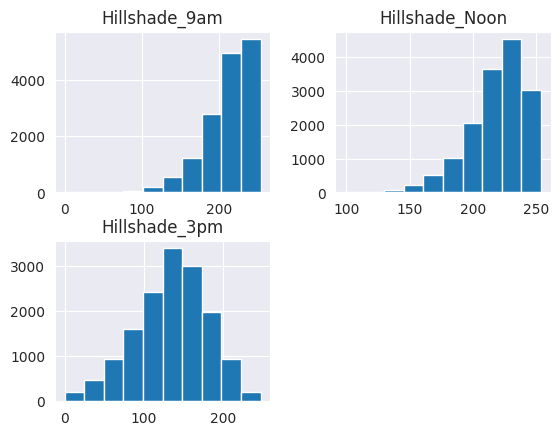

In [122]:
df_hillshade.hist()

<AxesSubplot: ylabel='Density'>

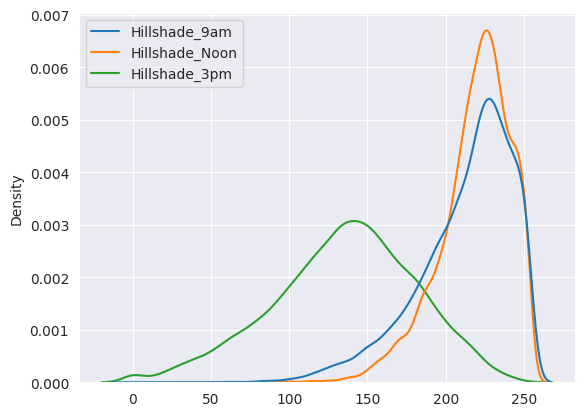

In [124]:
sns.kdeplot(df_hillshade)

In [125]:
# fig, ax = plt.subplots(figsize=(15,10))
# sns.kdeplot(data=tmp, x="Cover_Type", hue="Soil_Type", ax=ax)
# ax.set_xlim((0,8))
# ax.set_xticks((1,2,3,4,5,6,7))
# fig.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

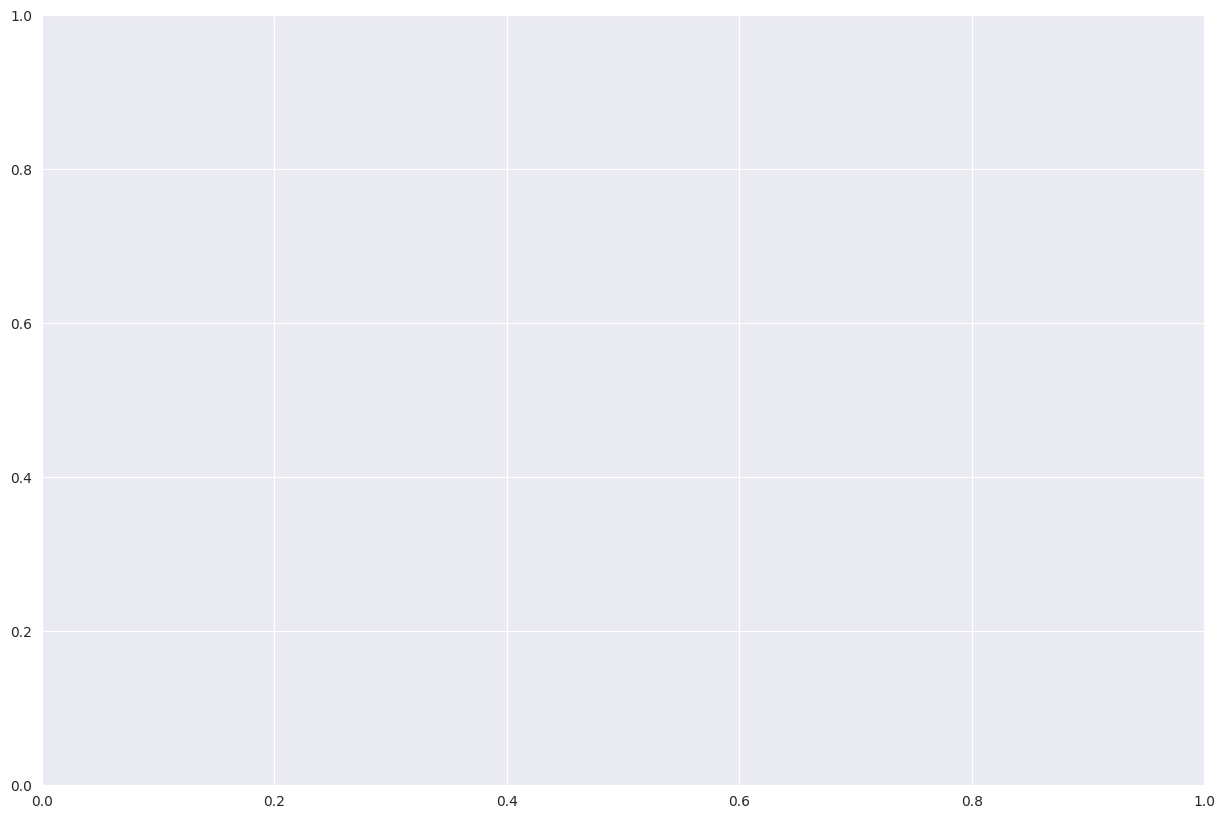

In [128]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(data=tmp[tmp["Cover_Type"]!=8], hue="Cover_Type", ax=ax, common_norm=False)


## Wilderness

In [107]:
df_wilderness = df.filter(regex="^Wilderness")
df_exclude_wilderness_redo_onehot = df.drop(df_wilderness.columns, axis=1)
df_exclude_wilderness_redo_onehot["Wilderness_Area"] = df_wilderness.idxmax(axis=1).apply(lambda x: int(x[-1:]))
df_wilderness.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Id,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0


In [104]:
sum(df_wilderness.sum(axis=1) != 1)

0

In [105]:
df_wilderness.sum(axis=0)

Wilderness_Area1    3597
Wilderness_Area2     499
Wilderness_Area3    6349
Wilderness_Area4    4675
dtype: int64

In [108]:
tmp = df_exclude_wilderness_redo_onehot.loc[:,["Cover_Type", "Wilderness_Area"]]

/tmp/ipykernel_36438/3840406343.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


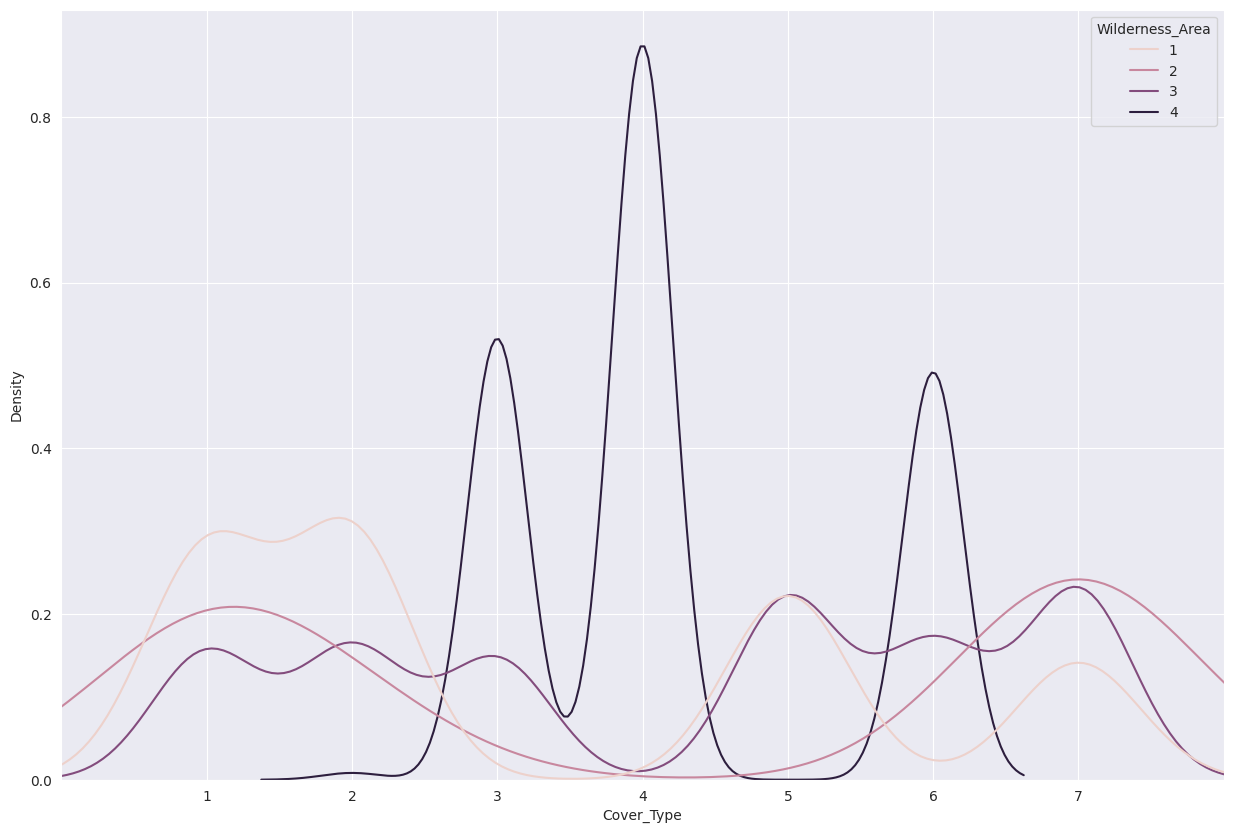

In [120]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(data=tmp, x="Cover_Type", hue="Wilderness_Area", ax=ax, common_norm=False)
ax.set_xlim((0,8))
ax.set_xticks((1,2,3,4,5,6,7))
fig.show()

/tmp/ipykernel_36438/261279420.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tmp[tmp["Wilderness_Area"]!=4], hue="Cover_Type", x="Wilderness_Area", ax=ax, common_norm=False)
/tmp/ipykernel_36438/261279420.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tmp[tmp["Wilderness_Area"]!=4], hue="Cover_Type", x="Wilderness_Area", ax=ax, common_norm=False)


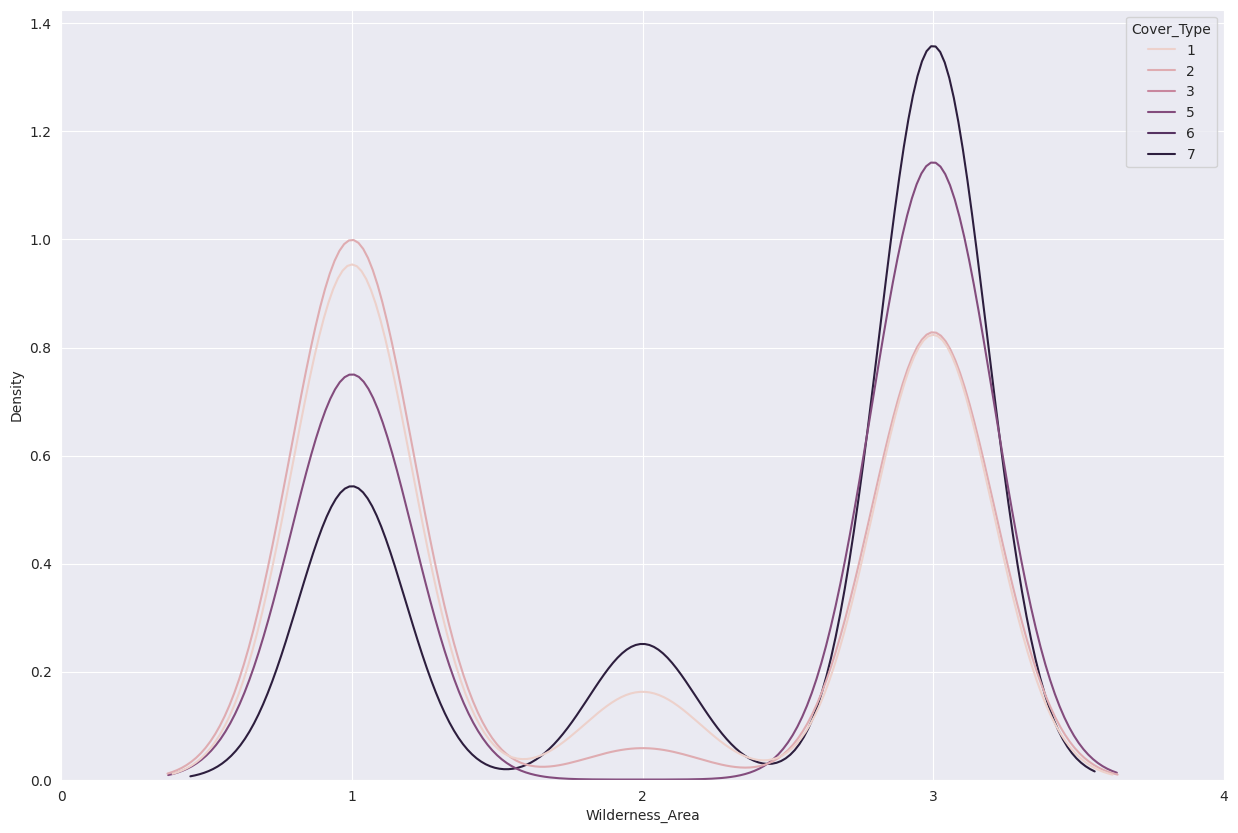

In [119]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(data=tmp[tmp["Wilderness_Area"]!=4], hue="Cover_Type", x="Wilderness_Area", ax=ax, common_norm=False)
ax.set_xticks(np.arange(0,5,1))


## The rest

In [42]:
df_exclude_soil_hillshade_wilderness = df.drop(list(df_soil.columns) + list(df_hillshade.columns) + list(df_wilderness.columns),
                                               axis=1)
df_exclude_soil_hillshade_wilderness.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,,,,,,,,
1,2596,51,3,258,0,510,6279,5
2,2590,56,2,212,-6,390,6225,5
3,2804,139,9,268,65,3180,6121,2
4,2785,155,18,242,118,3090,6211,2
5,2595,45,2,153,-1,391,6172,5


In [74]:
df["Cover_Type"].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64